In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize': (9, 6)})

In [4]:
event_data = pd.read_csv("event_data_train.csv")
submission_data = pd.read_csv("submissions_data_train.csv")

event_data['date'] = pd.to_datetime(event_data['timestamp'], unit='s')
submission_data['date'] = pd.to_datetime(submission_data['timestamp'], unit='s')

event_data['day'] = event_data['date'].dt.date
submission_data['day'] = submission_data['date'].dt.date

In [5]:
event_data.isna().sum()
event_data.nunique()
event_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [6]:
submission_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [7]:
submission_data.isna().sum()
submission_data.nunique()
user_scores = submission_data.pivot_table(index='user_id', columns='submission_status', values='step_id',
                                          aggfunc='count',
                                          fill_value=0).sort_values(by='correct', ascending=False).reset_index()
user_scores.reset_index(drop=True)

submission_status,index,user_id,correct,wrong
0,0,1046,421,513
1,1,5552,186,93
2,2,17135,168,177
3,3,6183,142,65
4,4,8461,135,42
...,...,...,...,...
9935,9935,1321,0,2
9936,9936,26349,0,1
9937,9937,9422,0,1
9938,9938,13408,0,2


<Axes: xlabel='day'>

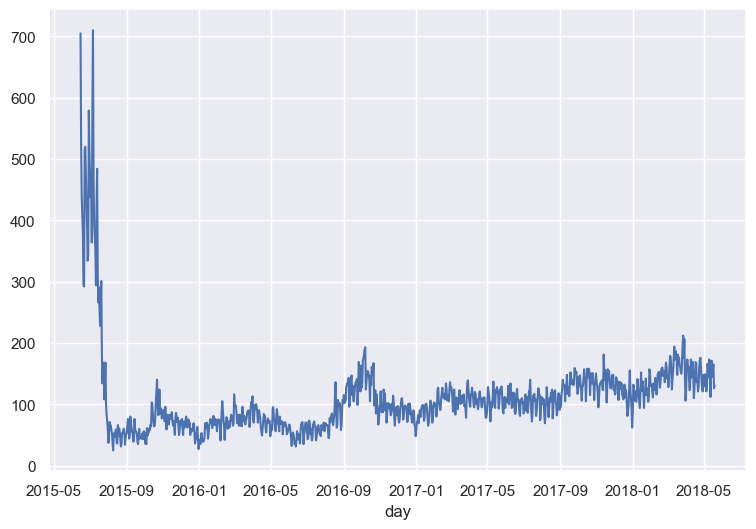

In [8]:
event_data.groupby("day").user_id.nunique().plot()

<Axes: >

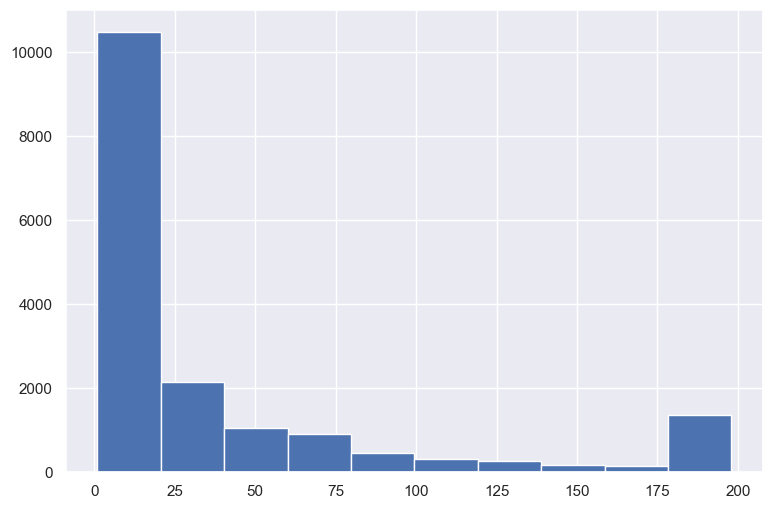

In [9]:
# Неправильное решение, тк мы не учитываем пользователей с 0 passed
event_data.query("action == 'passed'").groupby(["user_id"], as_index=False).agg(
    passed_cnt=pd.NamedAgg(column='action', aggfunc='count')).passed_cnt.hist()

action  user_id  discovered  passed  started_attempt  viewed
0             1           1       0                0       1
1             2           9       9                2      10
2             3          91      87               30     192
3             5          11      11                4      12
4             7           1       1                0       1
...         ...         ...     ...              ...     ...
19229     26790           8       8                1       9
19230     26793           1       0                1       1
19231     26794          69      69               34     180
19232     26797          10      10                2      13
19233     26798          12      12                3      12

[19234 rows x 5 columns]


<Axes: >

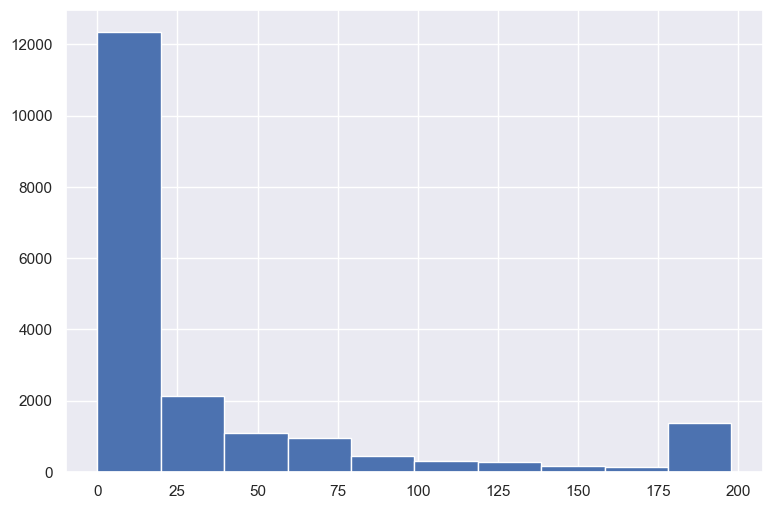

In [10]:
# Неправильное решение, тк мы не учитываем пользователей с 0 passed
# pd.get_dummies(event_data, columns=['action'], dtype=int)
user_event_data = event_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count',
                                         fill_value=0).reset_index()
print(user_event_data)
user_event_data.passed.hist()

In [11]:
submission_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


submission_status  correct  wrong
user_id                          
2                        2      0
3                       29     23
5                        2      2
8                        9     21
14                       0      1
...                    ...    ...
26787                    3      0
26790                    1      0
26794                   33      9
26797                    2      0
26798                    2      1

[9940 rows x 2 columns]


array([[<Axes: title={'center': 'correct'}>,
        <Axes: title={'center': 'wrong'}>]], dtype=object)

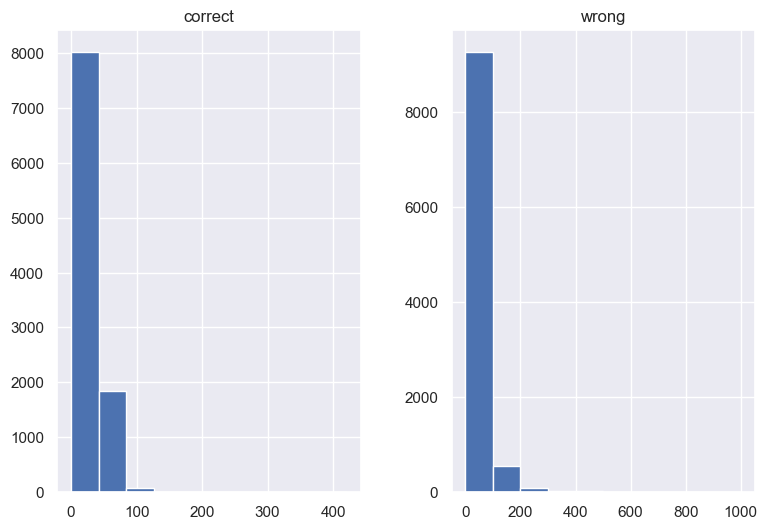

In [12]:
print(submission_data.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count',
                                  fill_value=0))
submission_data.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count',
                            fill_value=0)[['correct', 'wrong']].hist()

In [13]:
gap_data = event_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).groupby(
    'user_id').timestamp.apply(list).apply(np.diff).values
gap_data = pd.Series(np.concatenate(gap_data) / (24 * 60 * 60))

18.325995370370403

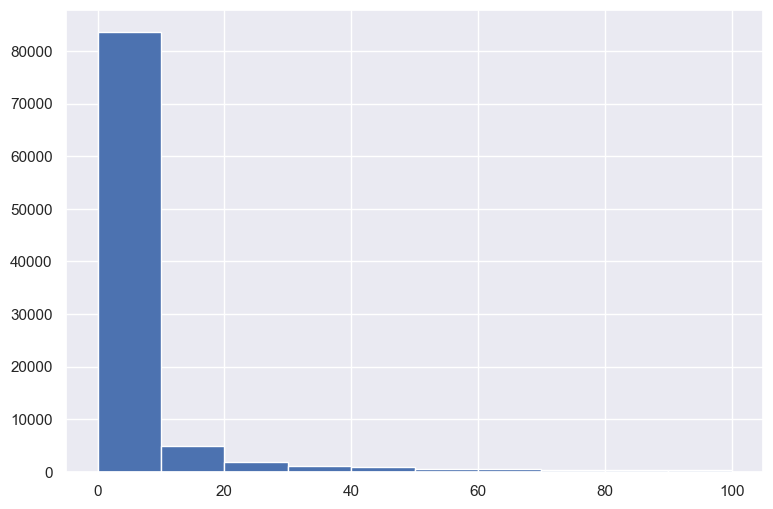

In [14]:
gap_data[gap_data < 100].hist()
gap_data.quantile(0.90)

In [15]:
drop_out_threshold = 30 * 24 * 60 * 60
current_date = event_data.timestamp.max()

In [16]:
user_data = event_data.groupby('user_id', as_index=False).agg(
    {'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})
user_data["is_gone_user"] = (current_date - user_data.last_timestamp) > drop_out_threshold

In [17]:
user_data = user_data.merge(user_scores, how='outer', on='user_id').merge(user_event_data, how='outer',
                                                                          on='user_id').fillna(0)

In [18]:
user_days = event_data.groupby('user_id').day.nunique().to_frame().reset_index()
user_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [19]:
user_data = user_data.merge(user_days, on='user_id', how='outer').fillna(0)
user_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [20]:
user_data.user_id.nunique(), event_data.user_id.nunique()

(19234, 19234)

In [21]:
user_data['passed_course'] = user_data.passed > 170
user_data.passed_course.value_counts(normalize=True)

passed_course
False    0.925912
True     0.074088
Name: proportion, dtype: float64

In [22]:
user_timestamp_data = event_data.groupby('user_id', as_index=False).agg(
    first_timestamp=pd.NamedAgg(column='timestamp', aggfunc='min'))
user_data = user_data.merge(user_timestamp_data, how='outer', on='user_id')

In [23]:
event_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [24]:
delta_time = 3 * 24 * 60 * 60
timestamp_data = event_data.groupby('user_id', as_index=False).agg(
    learing_timestamps=pd.NamedAgg(column='timestamp', aggfunc=lambda a: list(a[a <= a.min() + delta_time])))
user_data = user_data.merge(timestamp_data, how='outer', on='user_id')

In [25]:
user_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,first_timestamp,learing_timestamps
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464,"[1472827464, 1472827464]"
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364,"[1514383364, 1514383364, 1514383364, 151438337..."
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476,"[1434358476, 1434358476, 1434358476, 143435848..."
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809,"[1466156809, 1466156809, 1466156809]"
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660,"[1521634660, 1521634660, 1521634660]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False,1451484016,"[1451484016, 1451484016, 1451484016, 145148404..."
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False,1510225031,"[1510225031, 1510225031, 1510225034]"
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False,1495287049,"[1495287049, 1495287049, 1495287049, 149528933..."
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False,1508425316,"[1508425316, 1508425316, 1508425316, 150842532..."


In [26]:
event_data['user_time'] = event_data.user_id.map(str) + '_' + event_data.timestamp.map(str)

In [27]:
user_time = event_data.groupby('user_id', as_index=False) \
    .agg(user_threshold_time=pd.NamedAgg(column='timestamp', aggfunc=lambda x: x.min() + delta_time))
user_time['user_learning_time_threshold'] = user_time.user_id.map(
    str) + '_' + user_time.user_threshold_time.map(str)
user_time

,user_id,user_threshold_time,user_learning_time_threshold
0,1,1473086664,1_1473086664
1,2,1514642564,2_1514642564
2,3,1434617676,3_1434617676
3,5,1466416009,5_1466416009
4,7,1521893860,7_1521893860
...,...,...,...
19229,26790,1451743216,26790_1451743216
19230,26793,1510484231,26793_1510484231
19231,26794,1495546249,26794_1495546249
19232,26797,1508684516,26797_1508684516


In [28]:
event_data = event_data.merge(user_time[['user_id', 'user_learning_time_threshold']], how='outer', on='user_id')
event_data

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
1,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
2,32815,1514383364,discovered,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
3,32815,1514383364,viewed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
4,32815,1514383364,passed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
...,...,...,...,...,...,...,...,...
3480698,31956,1520978499,passed,26798,2018-03-13 22:01:39,2018-03-13,26798_1520978499,26798_1521234963
3480699,31956,1520978499,viewed,26798,2018-03-13 22:01:39,2018-03-13,26798_1520978499,26798_1521234963
3480700,31955,1520978742,passed,26798,2018-03-13 22:05:42,2018-03-13,26798_1520978742,26798_1521234963
3480701,31955,1520978742,discovered,26798,2018-03-13 22:05:42,2018-03-13,26798_1520978742,26798_1521234963


In [29]:
event_data_train = event_data.query('user_time <= user_learning_time_threshold')
event_data_train.groupby

<bound method DataFrame.groupby of          step_id   timestamp      action  user_id                date  \
0          31981  1472827464      viewed        1 2016-09-02 14:44:24   
1          31981  1472827464  discovered        1 2016-09-02 14:44:24   
2          32815  1514383364  discovered        2 2017-12-27 14:02:44   
3          32815  1514383364      viewed        2 2017-12-27 14:02:44   
4          32815  1514383364      passed        2 2017-12-27 14:02:44   
...          ...         ...         ...      ...                 ...   
3480698    31956  1520978499      passed    26798 2018-03-13 22:01:39   
3480699    31956  1520978499      viewed    26798 2018-03-13 22:01:39   
3480700    31955  1520978742      passed    26798 2018-03-13 22:05:42   
3480701    31955  1520978742  discovered    26798 2018-03-13 22:05:42   
3480702    31955  1520978742      viewed    26798 2018-03-13 22:05:42   

                day         user_time user_learning_time_threshold  
0        2016-09-02

In [30]:
last_timestamp = submission_data.groupby('user_id', as_index=False).agg(
    last_timestamp=pd.NamedAgg(column='timestamp', aggfunc='max'))
submission_data = submission_data.merge(last_timestamp, on='user_id')

In [31]:
submission_data.query('timestamp == last_timestamp and submission_status == "wrong"').step_id.value_counts()

step_id
31978    154
32812    133
32031     97
32202     92
33481     78
        ... 
33684      1
33686      1
33674      1
32929      1
33676      1
Name: count, Length: 72, dtype: int64

In [32]:
submission_data['users_time'] = submission_data.user_id.map(str) + '_' + submission_data.timestamp.map(str)
submission_data = submission_data.merge(user_time[['user_id', 'user_learning_time_threshold']], how='outer')
submission_data_train = submission_data[submission_data.users_time <= submission_data.user_learning_time_threshold]
submission_data_train.groupby('user_id').day.nunique().max()

4

In [33]:
X = submission_data_train.groupby('user_id').day.nunique(). \
    to_frame().reset_index().rename(columns=({
        'day': 'days'
}))

In [34]:
steps_tried = submission_data_train.groupby('user_id').step_id \
    .nunique().to_frame().reset_index().rename(columns={
        'step_id': 'steps_tried'
})

In [35]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [36]:
X = X.merge(submission_data_train.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index())

In [37]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [38]:
X = X.merge(event_data_train.pivot_table(index='user_id',
                        columns='action',
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [39]:
X = X.fillna(0)

In [40]:
X = X.merge(user_data[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [41]:
X[~((X.is_gone_user == False) & (X.passed_course == False))].head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,1,0.0,0.0,0.0,0.0,0.0,1,False,True
1,2,1.0,2.0,2.0,0.0,1.0,9,False,True
2,3,1.0,4.0,4.0,4.0,0.5,20,False,True
3,5,0.0,0.0,0.0,0.0,0.0,1,False,True
4,7,0.0,0.0,0.0,0.0,0.0,1,False,True


In [42]:
y = X.passed_course.map(int)
X = X.drop(['passed_course', 'is_gone_user'], axis=1)

In [43]:
X.set_index('user_id', inplace=True)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [46]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8991808443604284

  0%|          | 0/98 [00:00<?, ?it/s]

C:\Users\merku\AppData\Local\Temp\ipykernel_15888\213764524.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat(objs=[results, pd.DataFrame({"depth_value": [depth_value],
C:\Users\merku\.virtualenvs\StartML-c-K7MfSX\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\merku\AppData\Local\Temp\ipykernel_15888\213764524.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or al

,depth_value,train_accuracy,test_accuracy,cross_val_score
0,3,0.93039,0.924386,0.929924


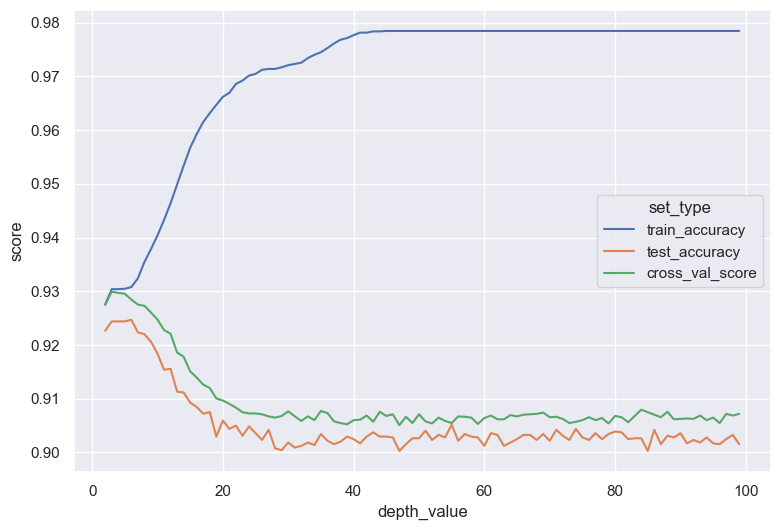

In [47]:
# Подбор параметром модели (тупой способ)
from tqdm.notebook import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = pd.DataFrame(columns=['depth_value', 'train_accuracy', 'test_accuracy', 'cross_val_score'])
metrics = pd.DataFrame(columns=['depth_value', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score'])

for depth_value in tqdm(range(2, 100)):
    cls = DecisionTreeClassifier(criterion='entropy', max_depth=depth_value)
    mean_cross_val_score = cross_val_score(cls, X_train, y_train, cv=5).mean()

    cls.fit(X_train, y_train)
    results = pd.concat(objs=[results, pd.DataFrame({"depth_value": [depth_value],
                                                     "train_accuracy": [cls.score(X_train, y_train)],
                                                     "test_accuracy": [cls.score(X_test, y_test)],
                                                     "cross_val_score": [mean_cross_val_score]})])

    metrics = pd.concat(objs=[metrics, pd.DataFrame({"depth_value": [depth_value],
                                                     "accuracy_score": [accuracy_score(y_test, cls.predict(X_test))],
                                                     "precision_score": [precision_score(y_test, cls.predict(X_test))],
                                                     "recall_score": [recall_score(y_test, cls.predict(X_test))],
                                                     "f1_score": [f1_score(y_test, cls.predict(X_test))]})])

results_long = pd.melt(frame=results, id_vars=['depth_value'],
                       value_vars=['train_accuracy', 'test_accuracy', 'cross_val_score'],
                       var_name='set_type', value_name='score')

sns.lineplot(data=results_long, x='depth_value', y='score', hue='set_type')
results[results['cross_val_score'] == results['cross_val_score'].max()]

<Axes: xlabel='depth_value', ylabel='score'>

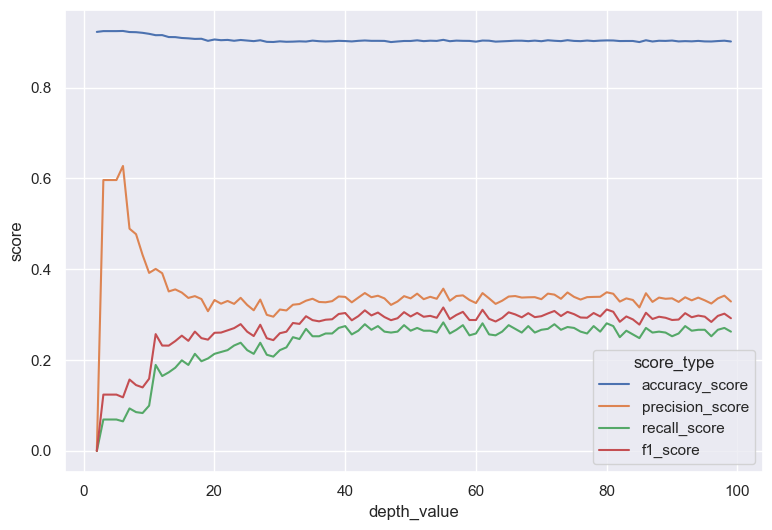

In [48]:
metrics_long = pd.melt(frame=metrics, id_vars=['depth_value'],
                       value_vars=['accuracy_score', 'precision_score', 'recall_score', 'f1_score'],
                       var_name='score_type', value_name='score')

sns.lineplot(data=metrics_long, x='depth_value', y='score', hue='score_type')

In [49]:
# Подбор параметром модели (умный способ)
from sklearn.model_selection import GridSearchCV

model_v2 = DecisionTreeClassifier()

parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(3, 10), 'min_samples_leaf': range(3, 12),
              'min_samples_split': range(3, 12)}

GS_clf = GridSearchCV(model_v2, param_grid=parameters, cv=5)
GS_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'min_samples_leaf': range(3, 12),
                         'min_samples_split': range(3, 12)})

In [50]:
best_parameters = GS_clf.best_params_
best_model = GS_clf.best_estimator_

best_model.score(X_test, y_test)

0.9243856332703214

In [51]:
best_parameters

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 11,
 'min_samples_split': 3}

<Axes: >

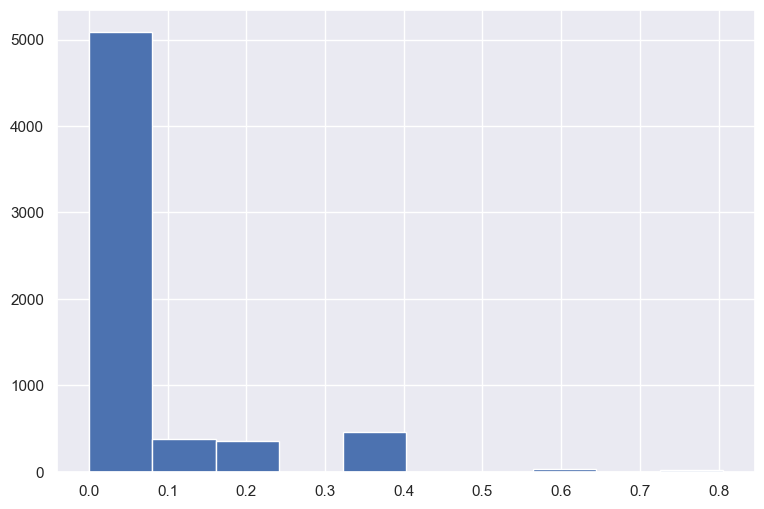

In [52]:
# Внутри дерева хранятся вероятности принадлежности объекта к одному из классов. 
# Как выбрать пороговые значения? Для этого использует ROC (Receiver  operating characteristic)
classes = best_model.classes_
# Порядок вероятностей соответствует порядку классов, определенному в обученной модели.
y_predicted_prob = best_model.predict_proba(X_test)
pd.Series(y_predicted_prob[:, 1]).hist()

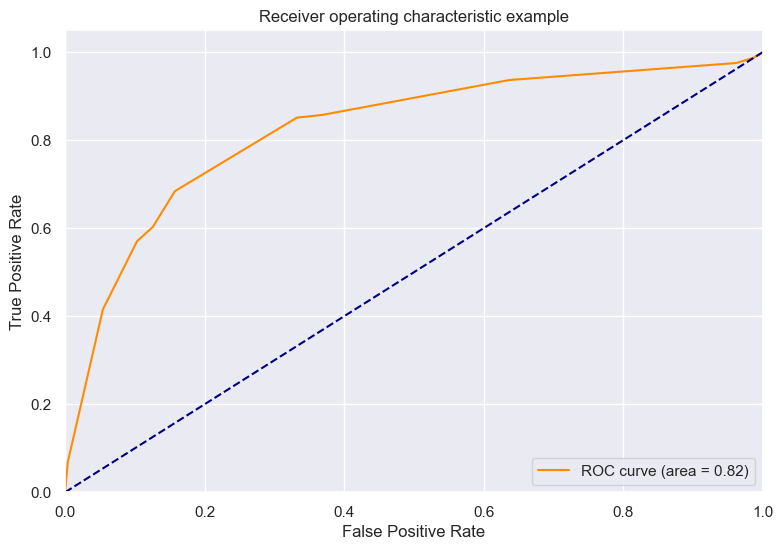

In [53]:
# ROC - Receiver  operating characteristic

from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()